## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 14: Data Transformation and Data Massaging  
#### Excercises

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Excercise 1
In your own words, what are the difference and similarities between Normalization and Standardization? How come some use them interchangeably? 


# Excercise 2
There are two instances of Data Transformation done during the subchapter  Binary Coding, Ranking Transformation, and Discretization that can be labeled as Massaging. Try to spot them and explain how come they can be labeled that way.

# Excercise 3
Of course, we know that one of the ways that the color of a data object is presented is by using their names. This is why we would assume color probably should be a normal attribute. However, you can transform this usually nominal attribute to numerical ones. There are two possible approaches. What are they? (Hint: one of them is attribute construction using RGB coding). Apply the two approaches to the following small dataset. The data shown in the table below are accessible in the file color_nominal.csv.

In [5]:
color_df = pd.read_csv('color_nominal.csv')
color_df

,index,Color
0,1,Blue
1,2,Blue
2,3,Black
3,4,White
4,5,Green
5,6,Orange
6,7,White
7,8,Blue
8,9,Brown
9,10,Yellow


# Excercise 4
You’ve seen two examples of attribute construction so far. One was under the subchapter Example – Construct one transformed attribute from two attributes, and the other was the previous exercises. Use these examples to argue if Attribute Construction is Data Massaging or not? 

# Excercise 5
In this exercise, you will get to work on a dataset collected for research and development. The dataset was used in a recent publication titled Misfire and valve clearance faults detection in the combustion engines based on a multi-sensor vibration signal monitoring to show high-accuracy detection of engine failure is possible using vibrational signals. To see this article you may use this link: https://www.sciencedirect.com/science/article/abs/pii/S0263224118303439.

The dataset that you have access to is Noise_Analysis.csv. This dataset has 7500 rows, each showing 1 second (1000 milliseconds) of the engine vibrational signal and the state of the engine (Label). We want to use the vibrational signal to predict the state of the engine. There are 5 states - H: Healthy, M1: Missfire 1, M2: Missfire 2, M12: Missfire 1&2, VC: Valve Clearance. 
To predict (classify) these states, we need to first perform feature extraction from the vibrational signal. Extract the following 5 morphological features and then use them to create a Decision Tree that can classify them. 

    - N_Peaks: number of peaks (see Figure 14.13)
    - N_Valleys: number of valleys (see Figure 14.13)
    - Max_Oscilate: maximum oscillation (see Figure 14.13)
    - Negative_area: the absolute value of the total sum of negative signals
    - Positive_area: the total sum of the positive signals
    
Make sure to tune the Decision Tree to come to a final Tree that can be used for analysis. After creating the decision tree, share your observations.

Hint: to find N_Peaks and N_Valleys, you may want to use the function **scipy.signal.find_peaks**.


In [8]:
noise_df = pd.read_csv('Noise_Analysis.csv')
noise_df.set_index('index',inplace=True)
noise_df

,Label,milisec_0,milisec_1,milisec_2,milisec_3,milisec_4,milisec_5,milisec_6,milisec_7,milisec_8,...,milisec_990,milisec_991,milisec_992,milisec_993,milisec_994,milisec_995,milisec_996,milisec_997,milisec_998,milisec_999
index,,,,,,,,,,,,,,,,,,,,,
Noise Signal 1,H,218.121231,83.260448,-171.715919,-334.164511,-493.856273,-341.023331,-529.488276,-475.467239,-547.259713,...,-47.005307,139.662816,611.387586,649.477417,701.042616,973.148888,893.575081,1099.615073,717.960356,576.439463
Noise Signal 2,H,286.028658,302.516529,49.415115,-285.621999,-446.169008,-653.537454,-618.822984,-521.051079,-526.932875,...,-343.414948,227.831890,409.538255,799.384449,886.400371,892.112768,948.695204,858.660988,753.486536,594.196272
Noise Signal 3,H,160.356579,241.849418,-213.888990,-203.426355,-527.776910,-779.282475,-656.317109,-689.092966,-374.904570,...,-94.862095,267.204940,674.276769,765.055623,788.894724,1045.045558,949.797142,1032.379160,646.714166,625.072057
Noise Signal 4,H,192.916567,189.895758,-122.502429,-344.899052,-424.732880,-559.880077,-770.073265,-605.008572,-671.292014,...,-153.338606,287.535790,445.399193,858.555066,893.376572,951.218463,908.459075,1062.439239,684.095588,662.084909
Noise Signal 5,H,357.865490,21.498910,-99.757282,-442.996044,-348.824917,-672.973898,-721.821294,-660.141267,-350.534396,...,-187.225616,154.471786,542.964399,639.011296,888.284541,993.966368,870.194809,970.666335,815.643339,548.593483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Noise Signal 7496,VC,-871.038211,-857.585756,-1084.872882,-1177.149719,-755.381968,-782.049434,-370.254315,-116.234304,322.541922,...,605.561363,584.492743,726.228263,876.117314,642.747886,857.570530,486.806088,104.041237,-104.826901,-271.891926
Noise Signal 7497,VC,-514.079974,-790.235662,-1054.225111,-863.238695,-998.375871,-878.847665,-463.876883,-69.401172,180.113204,...,576.524219,765.983282,727.726413,938.645140,799.206149,651.831093,511.832414,33.470498,1.321876,-435.379330
Noise Signal 7498,VC,-526.580572,-756.580637,-666.990950,-802.983049,-817.142090,-773.990599,-519.493294,-124.753486,108.096179,...,676.847537,683.243404,844.802452,965.870499,896.747468,572.347868,569.320865,107.587275,-164.596406,-379.255193


In [9]:
noise_df.Label.value_counts()

VC     1500
M2     1500
M1     1500
M12    1500
H      1500
Name: Label, dtype: int64

In [15]:
feature_df = pd.DataFrame(index=noise_df.index,columns =
                          ['N_Peaks','N_Valleys','Max_Oscilate',
                           'Negative_area','Positive_area','Label'])
feature_df

,N_Peaks,N_Valleys,Max_Oscilate,Negative_area,Positive_area,Label
index,,,,,,
Noise Signal 1,NaN,NaN,NaN,NaN,NaN,NaN
Noise Signal 2,NaN,NaN,NaN,NaN,NaN,NaN
Noise Signal 3,NaN,NaN,NaN,NaN,NaN,NaN
Noise Signal 4,NaN,NaN,NaN,NaN,NaN,NaN
Noise Signal 5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
Noise Signal 7496,NaN,NaN,NaN,NaN,NaN,NaN
Noise Signal 7497,NaN,NaN,NaN,NaN,NaN,NaN
Noise Signal 7498,NaN,NaN,NaN,NaN,NaN,NaN


# Excercise 6
We discussed in this chapter the possible distinction between Data Massaging and Data Transformation. We also saw that Functional Data Analysis (FDA) can be used both for Data Reduction and Data Transformation. Review all of the FDA examples you have experienced in this book (Chapter 13 Data Reduction, and this chapter) and use them to make a case regarding if the FDA should be labeled as Data Massaging or not. 

# Excercise 7
Review exercise 8 in Chapter 12 Data Fusion & Integration. In that exercise, we transformed the attribute of one of the datasets so the fusion of the two sources became possible. How would you describe that data transformation? Could we call it Data Massaging?


# Excercise 8
In this exercise, we will use BrainAllometry_Supplement_Data.csv from a paper titled The allometry of brain size in mammals. The data may also be accessed from https://datadryad.org/stash/dataset/doi:10.5061/dryad.2r62k7s. 
With the hope of being able to see the relationship between mean body mass and mean brain mass of species in nature, one has come up with the following scatterplot. However, you can see that the relationship is not very well shown. What transformation could fix this? Apply it and then share your observations.


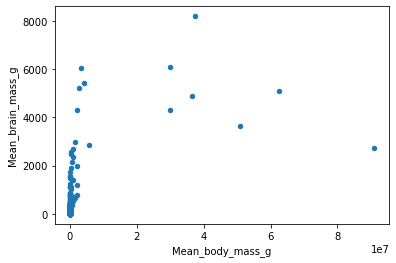

In [4]:
species_df = pd.read_csv('BrainAllometry_Supplement_Data.csv')
species_df.plot.scatter(x='Mean_body_mass_g',y='Mean_brain_mass_g')
plt.show()

# Excercise 9

In this chapter we learned three techniques to deal with noise, naming, Smoothing, Aggregation and Binning. Why do you think these methods were covered under Data Transformation, and not under Data Cleaning Level Ⅲ? Explain.

# Excercise 10
In two chapters, (Chapter 13 Data Reduction, and this chapter) and under three areas of data preprocessing we have shown the applications of Functional Data Analysis (FDA): Data Reduction, Feature Extraction, Smoothing. Find examples of the FDA in these two chapters, and then explain how come FDA can manage to do all these different data preprocessing. What is about FDA that allows it to be such a multipurpose toolkit? 


# Excercise 11
In Figure 14.18, we saw that.KernelReg() on all of signal_df did not perform very well, but it did perform excellently on part of it. How about trying to smooth all of singal_df by a combination of rolling data smoothing and functional data smoothing? To do this we need to have windows rolling calculations with a step size. Unfortunately, the pandas .rolling() function only accommodate the step size of one as shown in Figure 14.18. So take the matters in your hand and engineer a looping mechanism that can use .KernelReg() to smooth all of singal_df. 


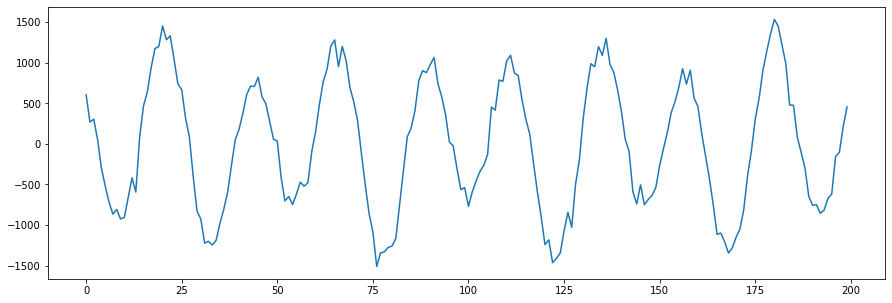

In [7]:
signal_df = pd.read_csv('Noise_data.csv')
signal_df.drop(columns='t',inplace=True)
signal_df.Signal.plot(figsize=(15,5))
plt.show()

# Excercise 12
Use United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv to recreate Figure 14.21. You may want to pull the most updated data from https://catalog.data.gov/dataset/united-states-covid-19-cases-and-deaths-by-state-over-time to develop an updated visualization. (Hint: you will need to work with the two columns new_case and new_death)  


In [116]:
dayStateCOVID_df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
dayStateCOVID_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,09/01/2021,ND,118491,107475.0,11016.0,536,66.0,1562,NaN,NaN,1,0.0,09/02/2021 01:49:05 PM,Agree,Not agree
1,07/30/2020,ME,3910,3497.0,413.0,22,2.0,123,122.0,1.0,2,0.0,07/31/2020 02:35:06 PM,Agree,Agree
2,09/19/2021,DE,128253,117969.0,10284.0,450,36.0,1920,1756.0,164.0,0,0.0,09/20/2021 01:47:59 PM,Agree,Agree
3,06/15/2020,WI,25480,22932.0,2548.0,185,11.0,700,694.0,6.0,2,0.0,06/16/2020 02:10:11 PM,Agree,Agree
4,04/11/2020,ND,293,NaN,NaN,15,NaN,7,NaN,NaN,1,NaN,04/10/2020 04:22:39 PM,Agree,Not agree


In [117]:
dayStateCOVID_df.drop(columns = ['tot_cases','conf_cases','prob_cases','pnew_case','tot_death',
                                 'conf_death','prob_death','pnew_death','created_at',
                                 'consent_cases','consent_deaths'], inplace=True )

In [118]:
dayStateCOVID_df

,submission_date,state,new_case,new_death
0,09/01/2021,ND,536,1
1,07/30/2020,ME,22,2
2,09/19/2021,DE,450,0
3,06/15/2020,WI,185,2
4,04/11/2020,ND,15,1
...,...,...,...,...
36535,07/19/2020,NJ,-10,34
36536,07/06/2021,RI,12,0
36537,08/13/2021,FSM,0,0
36538,12/15/2020,DC,301,4


# Excercise 13
It may seem like that binning and aggregation are the same method, however, they are not. Study the two examples in this chapter and explain what’s the difference between Aggregation and binning?
